# Theoretical background

## Derivation of the finite element method BVPs

Consider a  differential equation,
$$ \mathcal{L}(u) = f \quad \text{in } \Omega, $$

in one dimension for convenience.

** Boundary conditions in $\partial \Omega$?

where:
* $\mathcal{L}$ is a differential operator
* $u(x)$ is the unknown *exact* solution
* $f(x)$ is a given source term dependant only on space.
* $\Omega$ is the ND domain of the problem, with boundary $\partial \Omega$.

Define the residual,
$$ R(u) = \mathcal{L}(u) - f$$
For the exact solution, $R(u) = 0$ everywhere in $\Omega$.

### Approximate the solution with *shape functions*

In liue of an exact solution, we will have to settle for an approximate solution, $u_h$, for which $R(u_h) \ne 0$ but will be made as small as possible. As discussed in the Interpolation sections, a function can be approximated as a weighted sum of basis functions:

$$ \begin{align}
u_h(x) &= \sum_{i=1}^N w_i \phi_i(x) \\
\end{align}$$

Where:
* $w_i$ are the weights / coefficients of the approximation
* $\phi_i(x)$ are a set of suitable *shape functions*.

It is trivial to see that,
$$ \nabla u_h = \sum_i w_i \nabla \phi_i $$

### Minimizing the residual with the *Method of Weighted Residuals*

The best approximation will minimize the residual everywhere in $\Omega$. In previous work (e.g.: curve fit) we minimzed the square of the residual, but here we will use the Method of Weighted Residuals:

$$ \int_\Omega R v \  dx = 0 $$

The MWR is a *weaker* statement of minimization.
$v(x)$ is a *test* function for which we have options.


#### $v = 2\frac{\partial R}{\partial w_i}$ : Least Squares

If we take $v = 2\frac{\partial R}{\partial w_i}$,

$$ \begin{align}
\int_\Omega R \frac{\partial R}{\partial w_i} d\Omega &= 0 \\
\frac{\partial }{\partial w_i} \int_\Omega R^2 d\Omega &= 0
\end{align}$$

which is exactly the condition for finding the parameters for Least Squares minimization.

#### $v = \delta (x) $: Collocation methods

If $v = \delta (x)$ then for a discrete set of points $x_i$, the integral turns into a sum:

$$ \begin{align}
\int_\Omega R \delta(x_i) d\Omega &= 0 \\
\sum_i R(x_i) = 0
\end{align}$$

which requires that the residual be zero at all discretization points (the collocation method).

#### $v = \sum_i \phi_i$: The Galerkin method

The Galerkin method chooses the test functions to be in the same basis as the solution $u_h = \sum_i w_i \phi_i$.

$$ \begin{align}
\int_\Omega R v \  d\Omega &= 0 \\
\sum_i \int_\Omega R \phi_i \  d\Omega &= 0
\end{align}$$

Why does this work? Note that the MWR is an expression of orthogonality between $R$ and $v$. What this means is that the residual has no component in the space defined by the basis functions, or more simply, it can't be improved by changing the weights $w_i$. This is a more general expression for the minimum which is more in line with our discrete / numerical approach. It also opens avenues to choose $\phi_i$ carefully for computational efficiency!



## Meshing the domain

The geometry of the problem can generally be complex, with curved boundaries separating adjacent domains. Additionally, we may want different spatial resolution at different points in our model to capture gradients or differeing material properties.

The Finite Element Method partitions the domain into a *Finite* set of *Elements* through tesselation (space filling tiling). This meshing proceedure is actually very complex and there are sophisticated, dedicated software packages e.g., Cubit  (commercial), GMSH (open source), etc.

The most flexible element in 2D is triangular, but quadralateral elements are also popular. In 3D, tetrahedra are common, triangular prisms or rectangular prisms are also admissable.

Elements may be mixed to better capture features. E.g.: in Computational Fluid Dynamics one may use square boundary layers along a surface and then triangles in the stream.

One does have to be wary of degeneracy where one side is small compared to the others, which can lead to poor numerical performance.


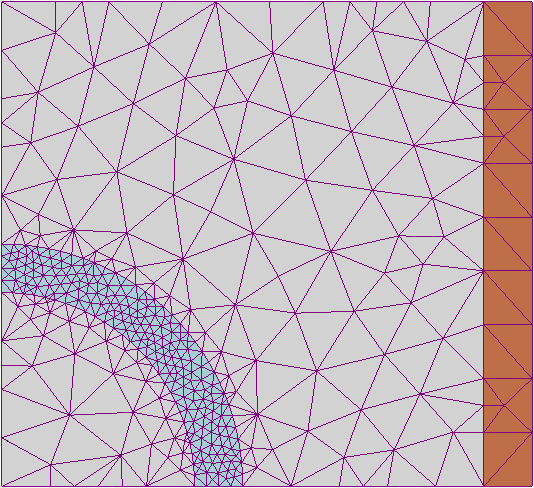

Notice how each mesh cell is a scaled, translated version of the same reference cell.